# Data cleaning

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
rename_cols = ["timestamp",	"ug_pg",	"faculties",	"num_majors",	"year_study",	"response_email",	"dom_int",	"commute_time",\
               	"days_on_campus",	"num_clubs_socs",	"avg_time_campus",	"rank_lec_tuts",	"rank_study_amts",	"rank_friends",	\
                "rank_fnb",	"rank_clubs_soc",	"rank_other",	"enj_soc_club",	"not_join_club",	"not_cont_club",\
                "usu_club_join",	"likely_involved_club",	"optimal_time",	"avg_hours_campus_non_study",	"reason_event_choose",	'rboe_club_soc']
data = pd.read_csv("data/survey_draft.csv", names = rename_cols, header = None)
data.drop(columns = ["timestamp", "response_email"])
print("done")

data["club_0"] = data["num_clubs_socs"] == "0"

done


# Looking at general information to see trends and hypothesis in Non active/active members of usyd campus 

## Breakdown of non active members in Undergrad and postgrad course

In [2]:
club_counts_by_ug_pg = data.groupby('ug_pg')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_ug_pg.columns = ['ug_pg', 'num_zero_clubs', 'total_count']
club_counts_by_ug_pg['num_non_zero_clubs'] = club_counts_by_ug_pg['total_count'] - club_counts_by_ug_pg['num_zero_clubs']
club_counts_by_ug_pg_table = club_counts_by_ug_pg[['ug_pg', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_ug_pg_table

,ug_pg,num_zero_clubs,num_non_zero_clubs
0,Postgraduate,1,7
1,Undergraduate,17,58


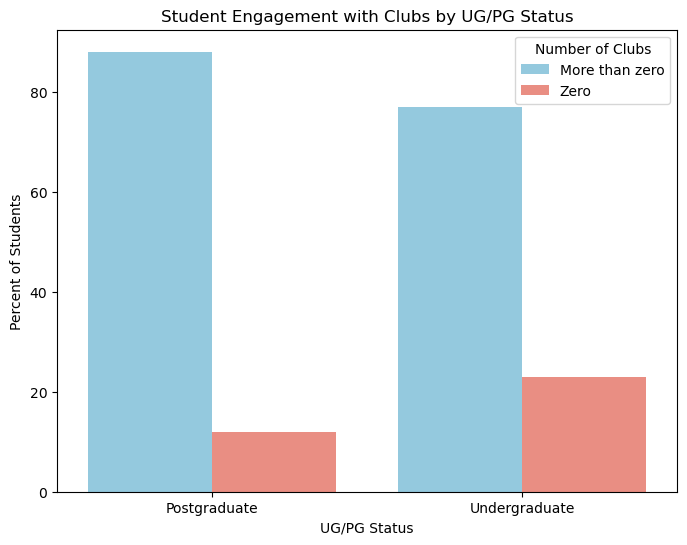

In [ ]:
club_counts_by_ug_pg['More than zero'] =round(club_counts_by_ug_pg['num_non_zero_clubs']/club_counts_by_ug_pg['total_count'],2)*100
club_counts_by_ug_pg['Zero'] =round(club_counts_by_ug_pg['num_zero_clubs']/club_counts_by_ug_pg['total_count'],2)*100
club_counts_melted = club_counts_by_ug_pg[['ug_pg', 'More than zero', 'Zero']].melt(
    id_vars='ug_pg',
    value_vars=['More than zero', 'Zero'],
    var_name='Number of Clubs',
    value_name='number_of_students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='ug_pg', y='number_of_students', hue='Number of Clubs',  palette={'Zero': 'salmon', 'More than zero': 'skyblue'}, data=club_counts_melted)
plt.ylabel('Percent of Students')
plt.xlabel('UG/PG Status')
plt.title('Comparision of Student Engagement with Clubs by UG/PG Status')
plt.show()

## Breakdown of non active and active members by Faculties

In [4]:
club_counts_by_fac = data.groupby('faculties')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_fac.columns = ['faculties', 'num_zero_clubs', 'total_count']
club_counts_by_fac['num_non_zero_clubs'] = club_counts_by_fac['total_count'] - club_counts_by_fac['num_zero_clubs']
club_counts_by_fac_table = club_counts_by_fac[['faculties', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_fac_table 

,faculties,num_zero_clubs,num_non_zero_clubs
0,Arts and Social Sciences,4,11
1,Faculty of Engineering,0,12
2,"Faculty of Engineering, Sydney Law School",1,1
3,"Faculty of Engineering, University of Sydney B...",1,2
4,Faculty of Medicine and Health,0,6
5,Faculty of Science,3,14
6,"Faculty of Science, Faculty of Engineering",1,3
7,"Faculty of Science, Faculty of Medicine and He...",1,3
8,"Sydney School of Architecture, Design & Planning",0,3
9,"Sydney School of Architecture, Design & Planning",0,1


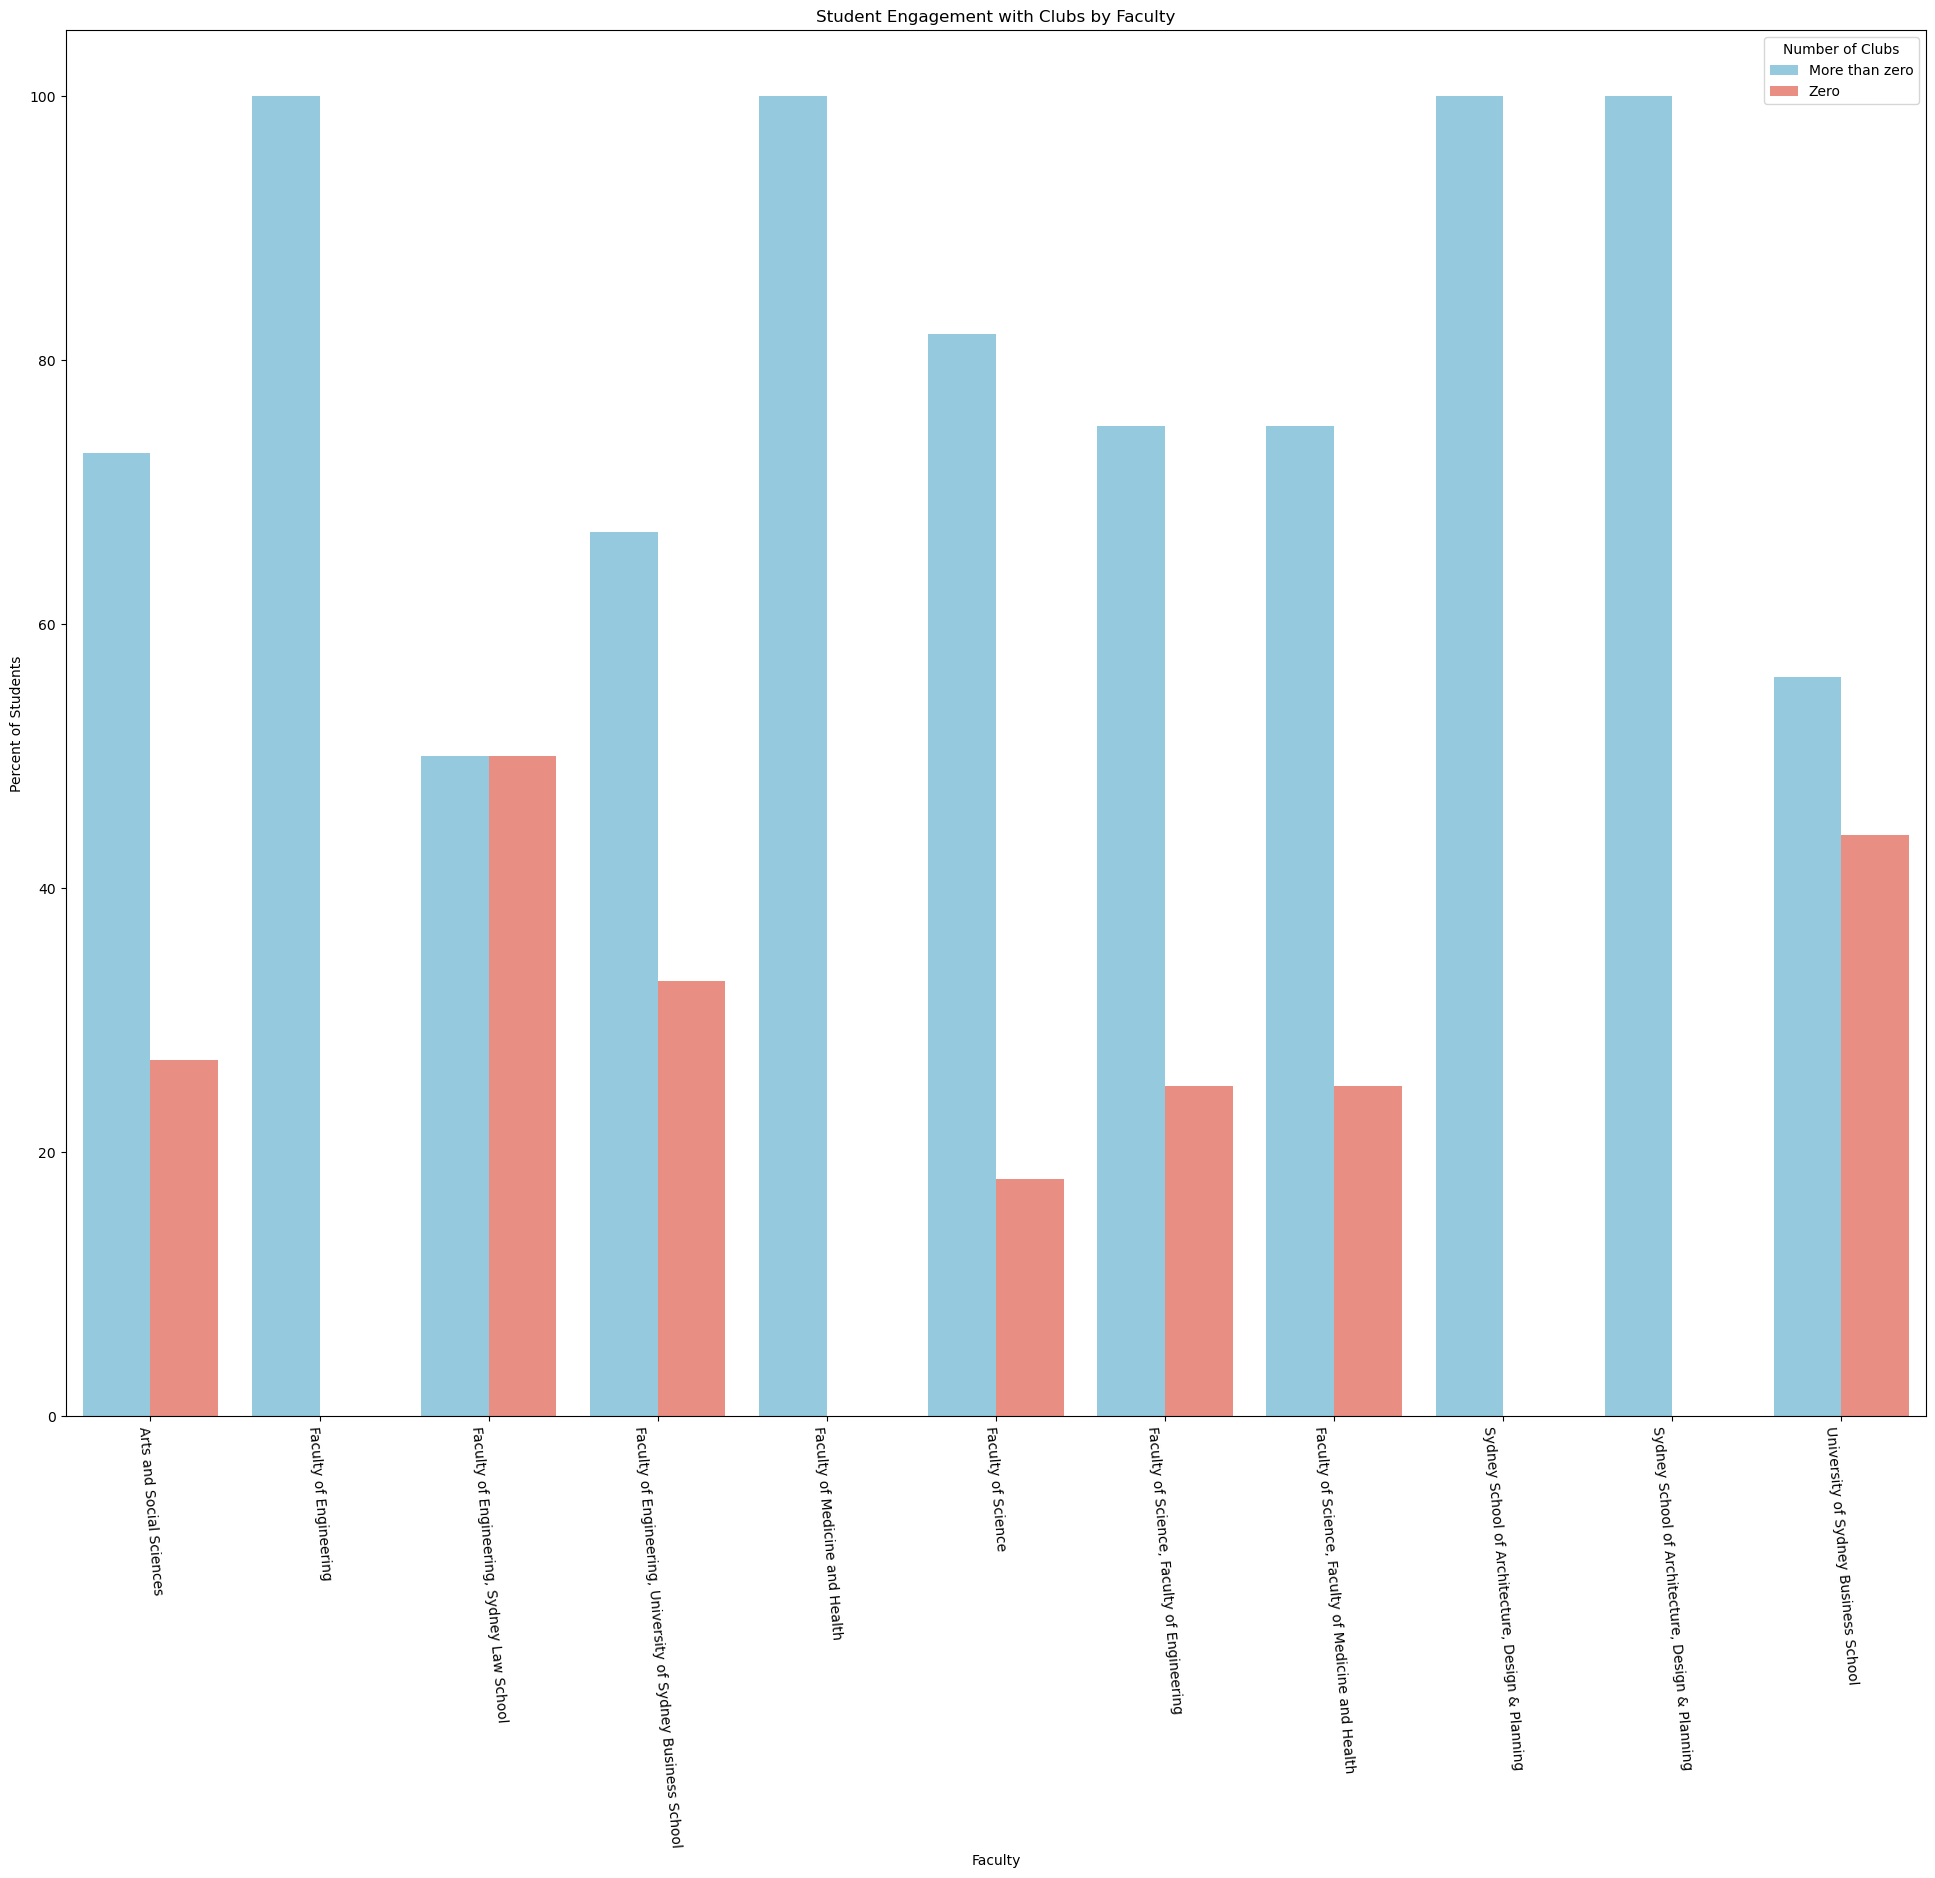

In [ ]:
club_counts_by_fac['More than zero'] =round(club_counts_by_fac['num_non_zero_clubs']/club_counts_by_fac['total_count'],2)*100
club_counts_by_fac['Zero'] =round(club_counts_by_fac['num_zero_clubs']/club_counts_by_fac['total_count'],2)*100
club_counts_by_fac_melted = club_counts_by_fac[['faculties', 'More than zero', 'Zero']].melt(
    id_vars='faculties',
    value_vars=['More than zero', 'Zero'],
    var_name='Number of Clubs',
    value_name='number_of_students'
)

plt.figure(figsize=(24, 18))
sns.barplot(x='faculties', y='number_of_students', hue='Number of Clubs',  palette={'Zero': 'salmon', 'More than zero': 'skyblue'}, data=club_counts_by_fac_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Faculty')
plt.xticks(rotation=-85)
plt.title('Comparision of Student Engagement with Clubs by Faculty')
plt.show()

## Breakdown of non active and active members by number of majors

In [6]:
club_counts_by_maj = data.groupby('num_majors')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_maj.columns = ['num_majors', 'num_zero_clubs', 'total_count']
club_counts_by_maj['num_non_zero_clubs'] = club_counts_by_maj['total_count'] - club_counts_by_maj['num_zero_clubs']
club_counts_by_maj_table = club_counts_by_maj[['num_majors', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_maj_table 

,num_majors,num_zero_clubs,num_non_zero_clubs
0,1,10,39
1,2,8,26


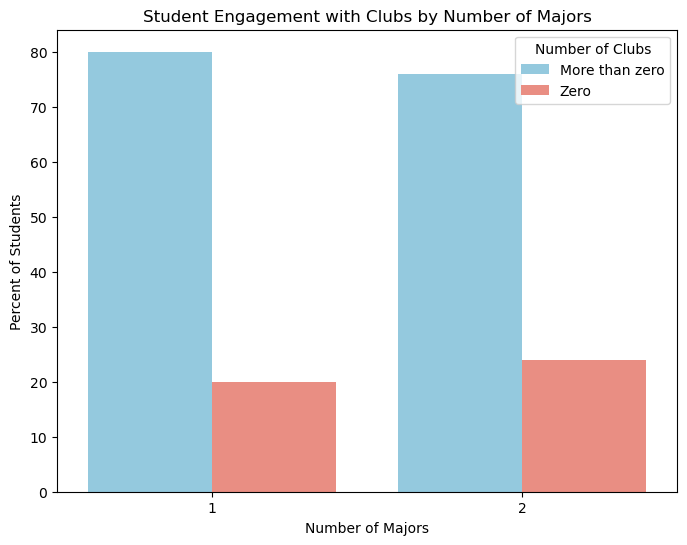

In [ ]:
club_counts_by_maj['More than zero'] =round(club_counts_by_maj['num_non_zero_clubs']/club_counts_by_maj['total_count'],2)*100
club_counts_by_maj['Zero'] =round(club_counts_by_maj['num_zero_clubs']/club_counts_by_maj['total_count'],2)*100
club_counts_by_maj_melted = club_counts_by_maj[['num_majors', 'More than zero', 'Zero']].melt(
    id_vars='num_majors',
    value_vars=['More than zero', 'Zero'],
    var_name='Number of Clubs',
    value_name='number_of_students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='num_majors', y='number_of_students', hue='Number of Clubs',  palette={'Zero': 'salmon', 'More than zero': 'skyblue'}, data=club_counts_by_maj_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Number of Majors')
plt.title('Comparision of Student Engagement with Clubs by Number of Majors')
plt.show()

## Breakdown of non active and active members by year

In [8]:
club_counts_by_year = data.groupby('year_study')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_year.columns = ['year_study', 'num_zero_clubs', 'total_count']
club_counts_by_year['num_non_zero_clubs'] = club_counts_by_year['total_count'] - club_counts_by_year['num_zero_clubs']
club_counts_by_year_table = club_counts_by_year[['year_study', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_year_table

,year_study,num_zero_clubs,num_non_zero_clubs
0,1st,2,13
1,2nd,0,14
2,3rd,12,17
3,4th,4,12
4,5th,0,8
5,6th,0,1


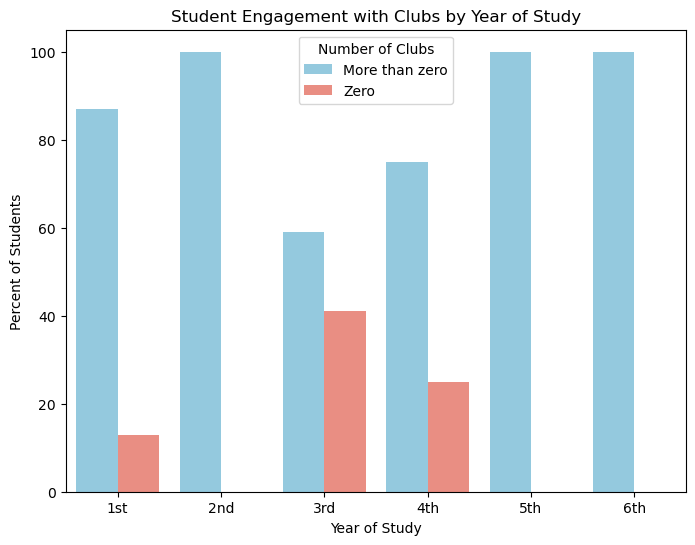

In [ ]:
club_counts_by_year['More than zero'] =round(club_counts_by_year['num_non_zero_clubs']/club_counts_by_year['total_count'],2)*100
club_counts_by_year['Zero'] =round(club_counts_by_year['num_zero_clubs']/club_counts_by_year['total_count'],2)*100
club_counts_by_year_melted = club_counts_by_year[['year_study', 'More than zero', 'Zero']].melt(
    id_vars='year_study',
    value_vars=['More than zero', 'Zero'],
    var_name='Number of Clubs',
    value_name='number_of_students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='year_study', y='number_of_students', hue='Number of Clubs',  palette={'Zero': 'salmon', 'More than zero': 'skyblue'}, data=club_counts_by_year_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Year of Study')
plt.title('Comparision of Student Engagement with Clubs by Year of Study')
plt.show()

## Breakdown of non active and active members by domestic/international

In [10]:
club_counts_by_dom = data.groupby('dom_int')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_dom.columns = ['dom_int', 'num_zero_clubs', 'total_count']
club_counts_by_dom['num_non_zero_clubs'] = club_counts_by_dom['total_count'] - club_counts_by_dom['num_zero_clubs']
club_counts_by_dom_table = club_counts_by_dom[['dom_int', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_dom_table

,dom_int,num_zero_clubs,num_non_zero_clubs
0,Domestic,9,38
1,International,9,27


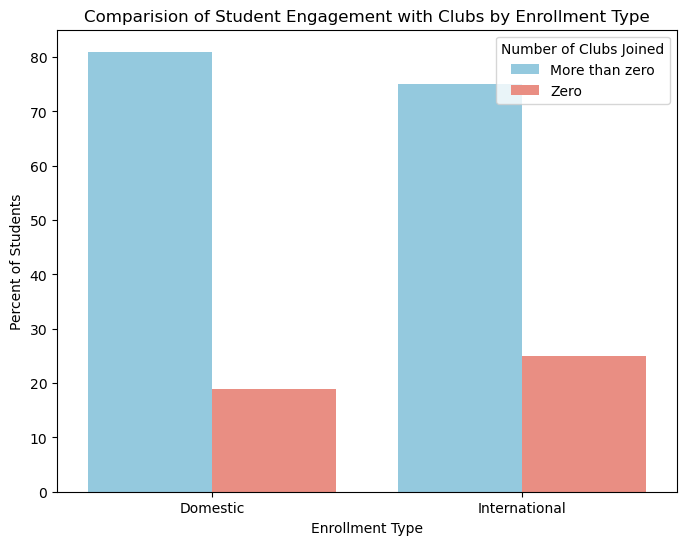

In [81]:
club_counts_by_dom['More than zero'] =round(club_counts_by_dom['num_non_zero_clubs']/club_counts_by_dom['total_count'],2)*100
club_counts_by_dom['Zero'] =round(club_counts_by_dom['num_zero_clubs']/club_counts_by_dom['total_count'],2)*100
club_counts_by_dom_melted = club_counts_by_dom[['dom_int', 'More than zero', 'Zero']].melt(
    id_vars='dom_int',
    value_vars=['More than zero', 'Zero'],
    var_name='Number of Clubs Joined',
    value_name='number_of_students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='dom_int', y='number_of_students', hue='Number of Clubs Joined',  palette={'Zero': 'salmon', 'More than zero': 'skyblue'}, data=club_counts_by_dom_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Enrollment Type')
plt.title('Comparision of Student Engagement with Clubs by Enrollment Type')
plt.show()

## Breakdown of non active and active members by commute time 


In [12]:
club_counts_by_ct = data.groupby('commute_time')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_ct.columns = ['commute_time', 'num_zero_clubs', 'total_count']
club_counts_by_ct['num_non_zero_clubs'] = club_counts_by_ct['total_count'] - club_counts_by_ct['num_zero_clubs']
club_counts_by_ct_table = club_counts_by_ct[['commute_time', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_ct_table

,commute_time,num_zero_clubs,num_non_zero_clubs
0,1 hr - 1.5 hr,4,8
1,30 min - 1 hr,4,31
2,< 30 min,8,25
3,>1.5 hr,1,0
4,Live on campus,1,1


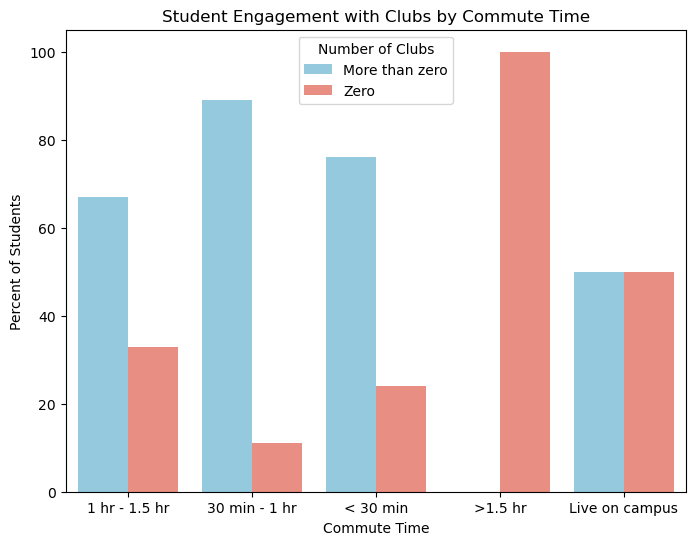

In [ ]:
club_counts_by_ct['More than zero'] =round(club_counts_by_ct['num_non_zero_clubs']/club_counts_by_ct['total_count'],2)*100
club_counts_by_ct['Zero'] =round(club_counts_by_ct['num_zero_clubs']/club_counts_by_ct['total_count'],2)*100
club_counts_by_ct_melted = club_counts_by_ct[['commute_time', 'More than zero', 'Zero']].melt(
    id_vars='commute_time',
    value_vars=['More than zero', 'Zero'],
    var_name='Number of Clubs',
    value_name='number_of_students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='commute_time', y='number_of_students', hue='Number of Clubs',  palette={'Zero': 'salmon', 'More than zero': 'skyblue'}, data=club_counts_by_ct_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Commute Time')
plt.title('Comparision of Student Engagement with Clubs by Commute Time')
plt.show()

## Breakdown of non active and active members by days on campus

In [14]:
club_counts_by_doc = data.groupby('days_on_campus')['club_0'].agg(['sum', 'count']).reset_index()
club_counts_by_doc.columns = ['days_on_campus', 'num_zero_clubs', 'total_count']
club_counts_by_doc['num_non_zero_clubs'] = club_counts_by_doc['total_count'] - club_counts_by_doc['num_zero_clubs']
club_counts_by_doc_table = club_counts_by_doc[['days_on_campus', 'num_zero_clubs', 'num_non_zero_clubs']]
club_counts_by_doc_table

,days_on_campus,num_zero_clubs,num_non_zero_clubs
0,1,0,3
1,2,7,14
2,3,9,22
3,4,1,17
4,5,1,9


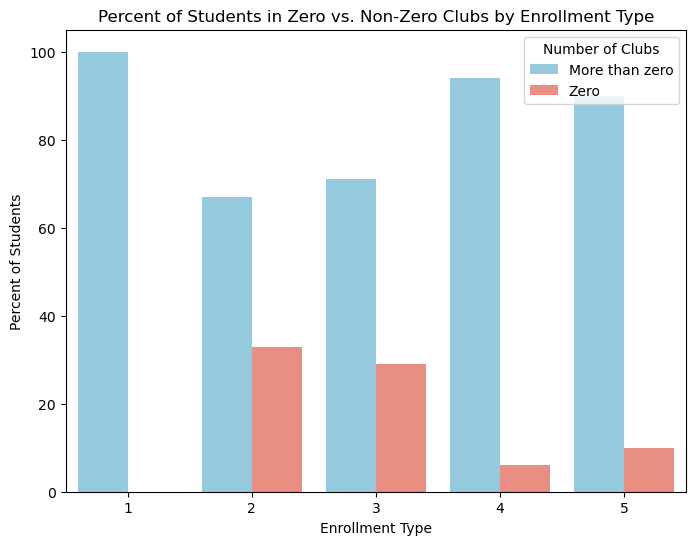

In [15]:
club_counts_by_doc['More than zero'] =round(club_counts_by_doc['num_non_zero_clubs']/club_counts_by_doc['total_count'],2)*100
club_counts_by_doc['Zero'] =round(club_counts_by_doc['num_zero_clubs']/club_counts_by_doc['total_count'],2)*100
club_counts_by_doc_melted = club_counts_by_doc[['days_on_campus', 'More than zero', 'Zero']].melt(
    id_vars='days_on_campus',
    value_vars=['More than zero', 'Zero'],
    var_name='Number of Clubs',
    value_name='number_of_students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='days_on_campus', y='number_of_students', hue='Number of Clubs',  palette={'Zero': 'salmon', 'More than zero': 'skyblue'}, data=club_counts_by_doc_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Enrollment Type')
plt.title('Percent of Students in Zero vs. Non-Zero Clubs by Enrollment Type')
plt.show()

# non active members trends

In [16]:
nam = data[data["club_0"]==True]
nam = nam[["dom_int","commute_time","avg_time_campus",	"rank_lec_tuts",	"rank_study_amts",	"rank_friends",	
           "rank_fnb",	"rank_clubs_soc", "rank_other","enj_soc_club",	"not_join_club",	"not_cont_club"]].copy()\
            .reset_index()[["dom_int","commute_time","avg_time_campus",	"rank_lec_tuts",	"rank_study_amts",	"rank_friends",	
           "rank_fnb",	"rank_clubs_soc","rank_other", "enj_soc_club",	"not_join_club",	"not_cont_club"]]


dom/ints and commute time 

In [17]:
commute_dom_int_counts = nam.groupby('commute_time')['dom_int'].value_counts().unstack(fill_value=0)
commute_dom_int_counts_table = commute_dom_int_counts.reset_index()
commute_dom_int_counts_table



dom_int,commute_time,Domestic,International
0,1 hr - 1.5 hr,3,1
1,30 min - 1 hr,2,2
2,< 30 min,3,5
3,>1.5 hr,1,0
4,Live on campus,0,1


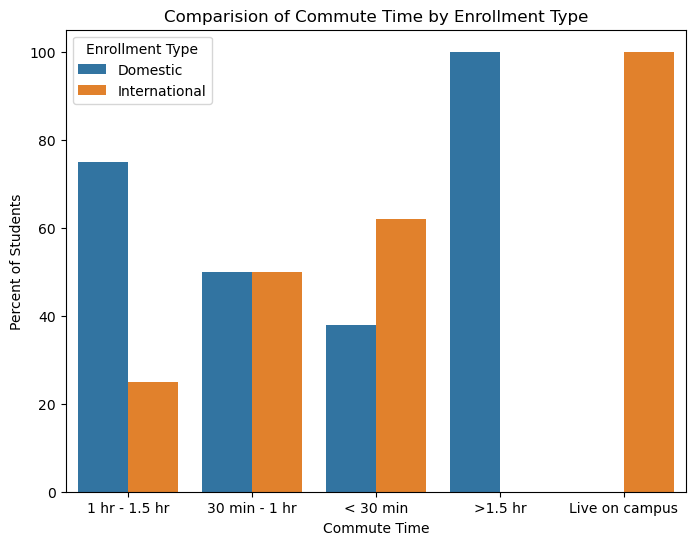

In [79]:
commute_dom_int_counts_table['total'] = commute_dom_int_counts_table['Domestic'] + commute_dom_int_counts_table['International']
commute_dom_int_counts_table['Domestic'] = round(commute_dom_int_counts_table['Domestic']/commute_dom_int_counts_table['total'],2)*100
commute_dom_int_counts_table['International'] = round(commute_dom_int_counts_table['International']/commute_dom_int_counts_table['total'],2)*100
commute_dom_int_melted = commute_dom_int_counts_table.melt(
    id_vars='commute_time',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='commute_time', y='Number of Students', hue='Student Type', data=commute_dom_int_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Commute Time')
plt.title('Comparision of Commute Time by Enrollment Type')
plt.legend(title='Enrollment Type')
plt.show()

dom_int and avg time

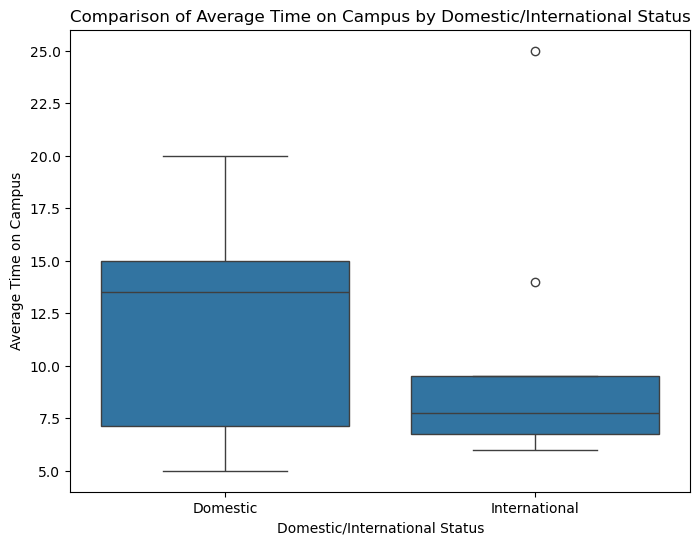

In [ ]:
dom_int_avg_time = nam[["dom_int","avg_time_campus"]].dropna()

plt.figure(figsize=(8, 6))
sns.boxplot(x='dom_int', y='avg_time_campus', data=dom_int_avg_time)
plt.title('Comparison of Average Time on Campus by Enrollment Type')
plt.legend(title='Enrollment Type')
plt.ylabel('Average Time on Campus')
plt.show()


dom int and rank lect/tut  

In [20]:
dom_int_rnk_lec = nam.groupby("rank_lec_tuts")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_lec_table = dom_int_rnk_lec.reset_index()


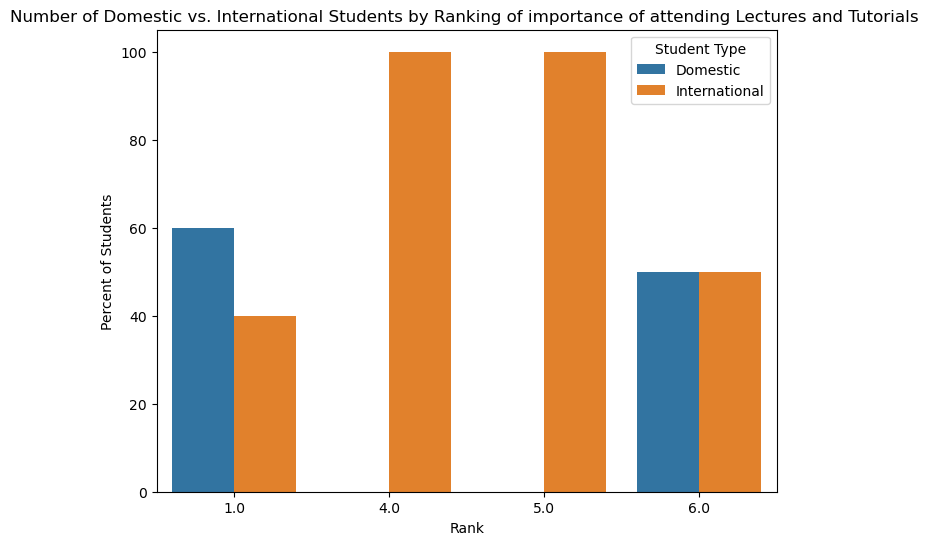

In [ ]:
dom_int_rnk_lec_table['total'] = dom_int_rnk_lec_table['Domestic'] + dom_int_rnk_lec_table['International']
dom_int_rnk_lec_table['Domestic'] = round(dom_int_rnk_lec_table['Domestic']/dom_int_rnk_lec_table['total'],2)*100
dom_int_rnk_lec_table['International'] = round(dom_int_rnk_lec_table['International']/dom_int_rnk_lec_table['total'],2)*100
dom_int_rnk_lec_table_melted = dom_int_rnk_lec_table.melt(
    id_vars='rank_lec_tuts',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='rank_lec_tuts', y='Number of Students', hue='Student Type', data=dom_int_rnk_lec_table_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Rank')
plt.title('Number of Domestic vs. International Students by Ranking of importance of attending Lectures and Tutorials ')
plt.legend(title='Enrollment Type')
plt.show()

dom/int and study/assignments

In [22]:
dom_int_rnk_study = nam.groupby("rank_study_amts")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_study_table = dom_int_rnk_study.reset_index()
dom_int_rnk_study_table


dom_int,rank_study_amts,Domestic,International
0,1.0,0,1
1,2.0,3,2
2,3.0,3,3
3,4.0,1,0
4,5.0,2,1
5,6.0,0,2


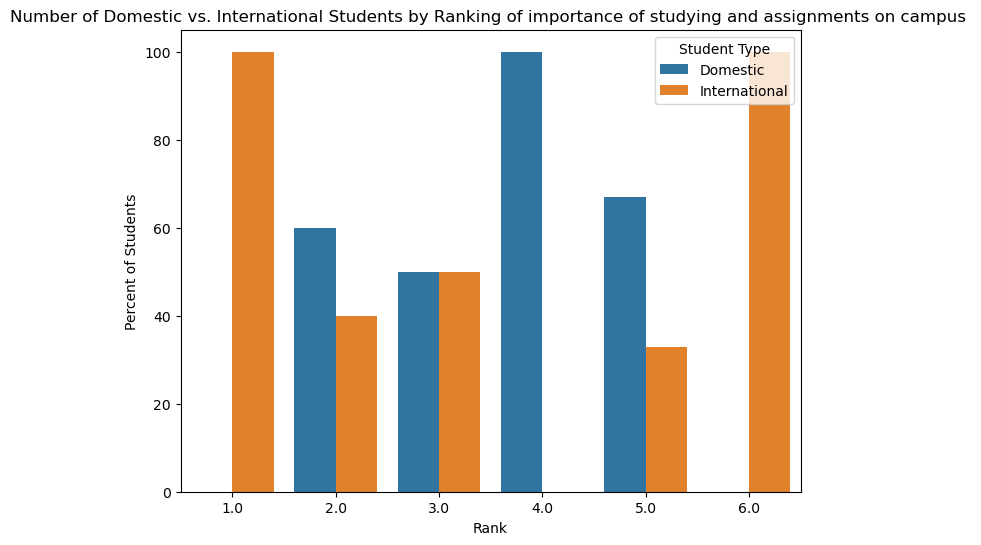

In [ ]:
dom_int_rnk_study_table['total'] = dom_int_rnk_study_table['Domestic'] + dom_int_rnk_study_table['International']
dom_int_rnk_study_table['Domestic'] = round(dom_int_rnk_study_table['Domestic']/dom_int_rnk_study_table['total'],2)*100
dom_int_rnk_study_table['International'] = round(dom_int_rnk_study_table['International']/dom_int_rnk_study_table['total'],2)*100
dom_int_rnk_study_table_melted = dom_int_rnk_study_table.melt(
    id_vars='rank_study_amts',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='rank_study_amts', y='Number of Students', hue='Student Type', data=dom_int_rnk_study_table_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Rank')
plt.title('Number of Domestic vs. International Students by Ranking of importance of studying and assignments on campus ')
plt.legend(title='Enrollment Type')
plt.show()

dom/ints and friends

In [24]:
dom_int_rnk_f = nam.groupby("rank_friends")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_f_table = dom_int_rnk_f.reset_index()
dom_int_rnk_f_table

dom_int,rank_friends,Domestic,International
0,1.0,0,1
1,2.0,1,3
2,3.0,4,4
3,4.0,1,1
4,5.0,1,0
5,6.0,2,0


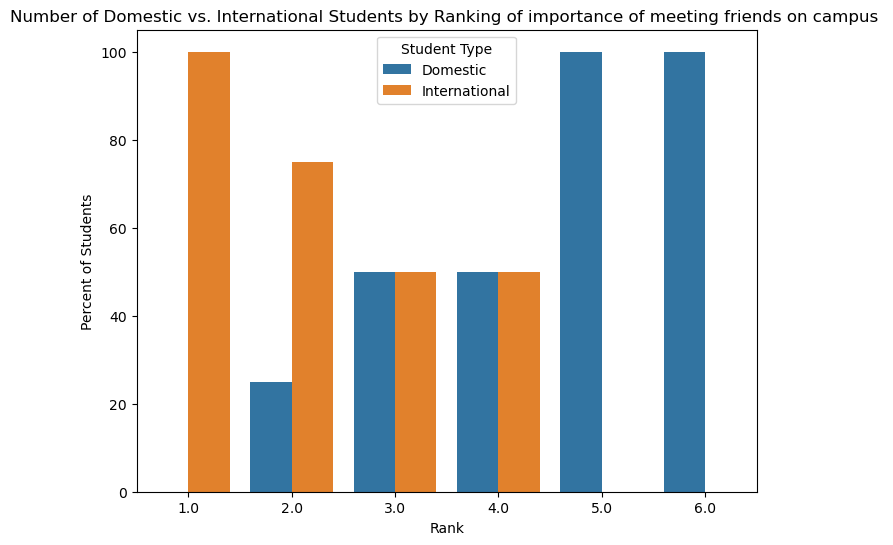

In [ ]:
dom_int_rnk_f_table['total'] = dom_int_rnk_f_table['Domestic'] + dom_int_rnk_f_table['International']
dom_int_rnk_f_table['Domestic'] = round(dom_int_rnk_f_table['Domestic']/dom_int_rnk_f_table['total'],2)*100
dom_int_rnk_f_table['International'] = round(dom_int_rnk_f_table['International']/dom_int_rnk_f_table['total'],2)*100
dom_int_rnk_f_table_melted = dom_int_rnk_f_table.melt(
    id_vars='rank_friends',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='rank_friends', y='Number of Students', hue='Student Type', data=dom_int_rnk_f_table_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Rank')
plt.title('Number of Domestic vs. International Students by Ranking of importance of meeting friends on campus ')
plt.legend(title='Enrollment Type')
plt.show()

dom/ints and food and beverages 

In [26]:
dom_int_rnk_fnb = nam.groupby("rank_fnb")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_fnb_table = dom_int_rnk_fnb.reset_index()
dom_int_rnk_fnb_table

dom_int,rank_fnb,Domestic,International
0,1.0,1,1
1,2.0,2,2
2,3.0,1,1
3,4.0,4,3
4,5.0,1,2


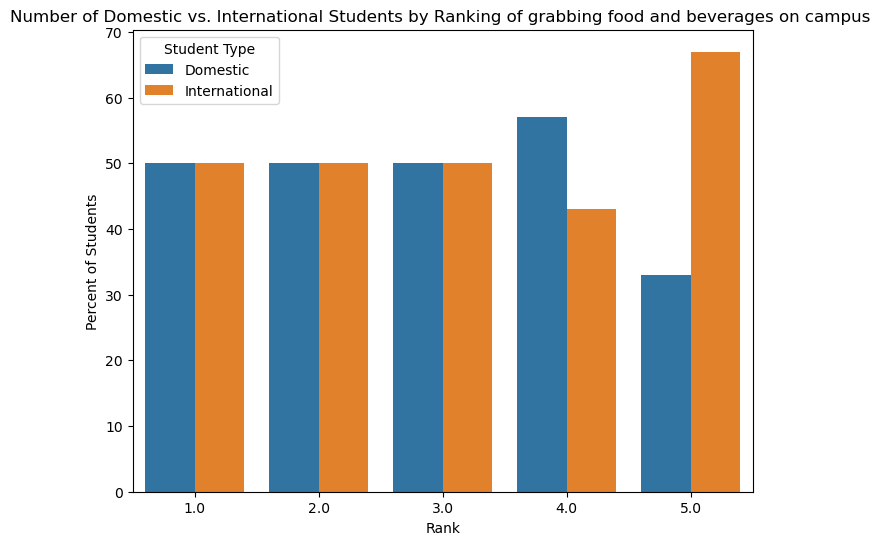

In [ ]:
dom_int_rnk_fnb_table['total'] = dom_int_rnk_fnb_table['Domestic'] + dom_int_rnk_fnb_table['International']
dom_int_rnk_fnb_table['Domestic'] = round(dom_int_rnk_fnb_table['Domestic']/dom_int_rnk_fnb_table['total'],2)*100
dom_int_rnk_fnb_table['International'] = round(dom_int_rnk_fnb_table['International']/dom_int_rnk_fnb_table['total'],2)*100
dom_int_rnk_fnb_table_melted = dom_int_rnk_fnb_table.melt(
    id_vars='rank_fnb',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='rank_fnb', y='Number of Students', hue='Student Type', data=dom_int_rnk_fnb_table_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Rank')
plt.title('Number of Domestic vs. International Students by Ranking of grabbing food and beverages on campus ')
plt.legend(title='Enrollment Type')
plt.show()

dom/int and clubs and socs

In [28]:
dom_int_rnk_cs = nam.groupby("rank_clubs_soc")['dom_int'].value_counts().unstack(fill_value=0)
dom_int_rnk_cs_table = dom_int_rnk_cs.reset_index()
dom_int_rnk_cs_table

dom_int,rank_clubs_soc,Domestic,International
0,1.0,1,0
1,2.0,3,2
2,3.0,0,1
3,4.0,1,2
4,5.0,4,1
5,6.0,0,3


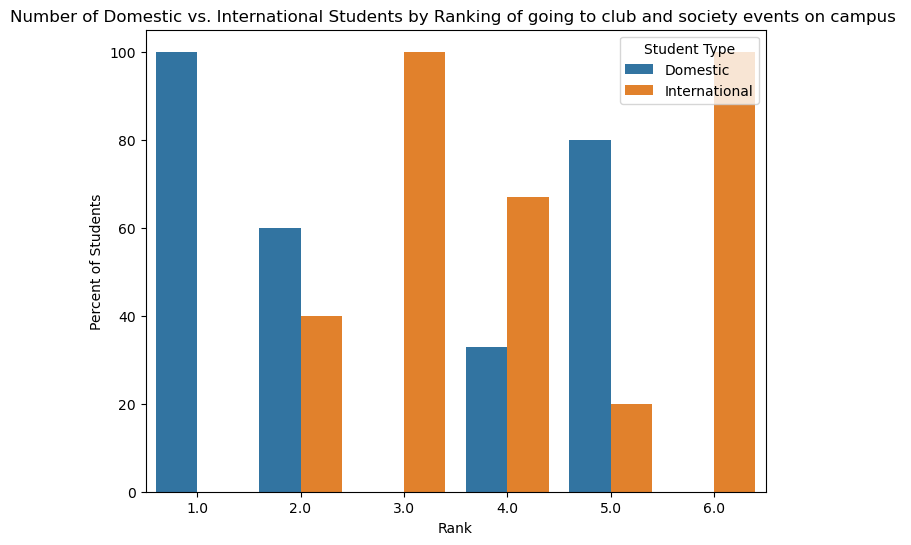

In [ ]:
dom_int_rnk_cs_table['total'] = dom_int_rnk_cs_table['Domestic'] + dom_int_rnk_cs_table['International']
dom_int_rnk_cs_table['Domestic'] = round(dom_int_rnk_cs_table['Domestic']/dom_int_rnk_cs_table['total'],2)*100
dom_int_rnk_cs_table['International'] = round(dom_int_rnk_cs_table['International']/dom_int_rnk_cs_table['total'],2)*100
dom_int_rnk_cs_table_melted = dom_int_rnk_cs_table.melt(
    id_vars='rank_clubs_soc',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='rank_clubs_soc', y='Number of Students', hue='Student Type', data=dom_int_rnk_cs_table_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Rank')
plt.title('Number of Domestic vs. International Students by Ranking of going to club and society events on campus ')
plt.legend(title='Enrollment Type')
plt.show()

dom/int and others  

In [30]:
dom_int_rnk_other = nam.groupby("rank_other")['dom_int'].value_counts().unstack(fill_value=0).reset_index()
dom_int_rnk_other

dom_int,rank_other,Domestic,International
0,1.0,1,2
1,3.0,1,0
2,4.0,2,2
3,5.0,1,4
4,6.0,4,1


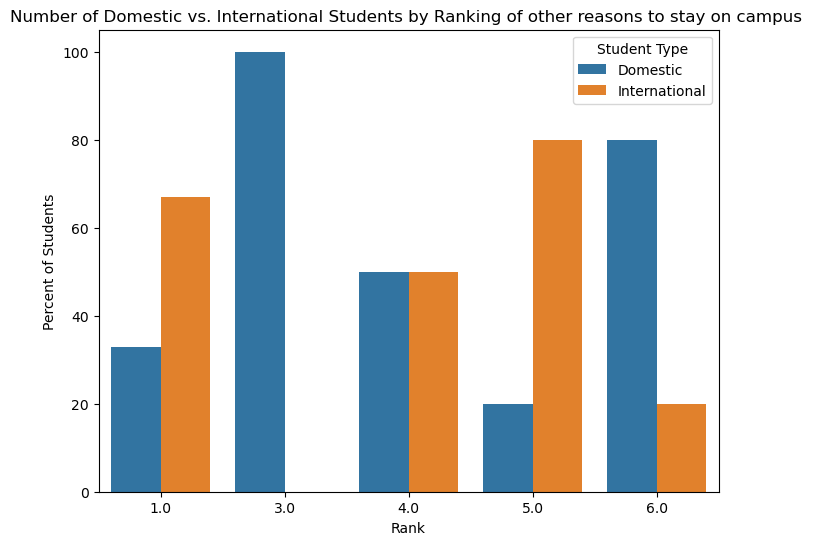

In [ ]:
dom_int_rnk_other['total'] = dom_int_rnk_other['Domestic'] + dom_int_rnk_other['International']
dom_int_rnk_other['Domestic'] = round(dom_int_rnk_other['Domestic']/dom_int_rnk_other['total'],2)*100
dom_int_rnk_other['International'] = round(dom_int_rnk_other['International']/dom_int_rnk_other['total'],2)*100
dom_int_rnk_other_melted = dom_int_rnk_other.melt(
    id_vars='rank_other',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='rank_other', y='Number of Students', hue='Student Type', data=dom_int_rnk_other_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Rank')
plt.title('Number of Domestic vs. International Students by Ranking of other reasons to stay on campus ')
plt.legend(title='Enrollment Type')
plt.show()

dom/ints and enjoy club and society 

In [32]:
dom_int_enjoy = nam.groupby("enj_soc_club")['dom_int'].value_counts().unstack(fill_value=0).reset_index()
dom_int_enjoy

dom_int,enj_soc_club,Domestic,International
0,No,2,3
1,Unsure,3,3
2,Yes,4,3


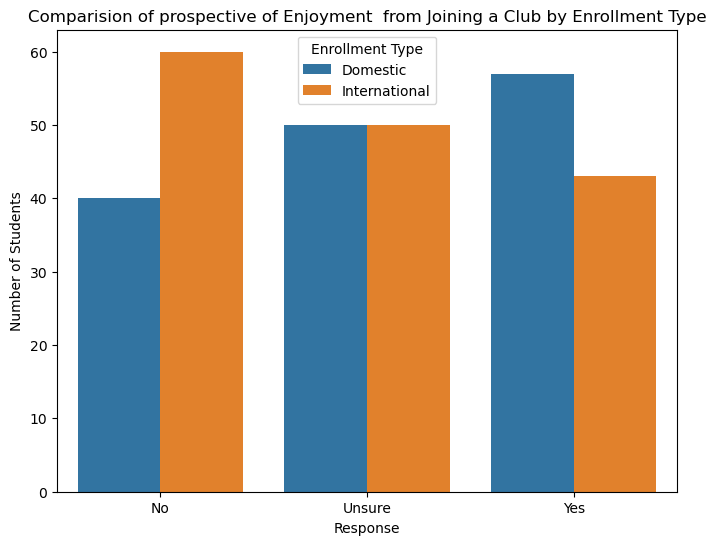

In [78]:
dom_int_enjoy_melted = dom_int_enjoy.melt(
    id_vars='enj_soc_club',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='enj_soc_club', y='Number of Students', hue='Student Type', data=dom_int_enjoy_melted)
plt.ylabel('Number of Students')
plt.xlabel('Response')
plt.title('Comparision of prospective of Enjoyment  from Joining a Club by Enrollment Type')
plt.legend(title='Enrollment Type')
plt.show()

dom/int and not_join_club

In [34]:
dom_int_njc = nam.groupby("not_join_club")['dom_int'].value_counts().unstack(fill_value=0).reset_index()
dom_int_njc

dom_int,not_join_club,Domestic,International
0,Academic Commitments,0,2
1,Commute/Location,2,1
2,Cost,1,0
3,Lack of Social Opportunities,2,2
4,Not Interested,4,4


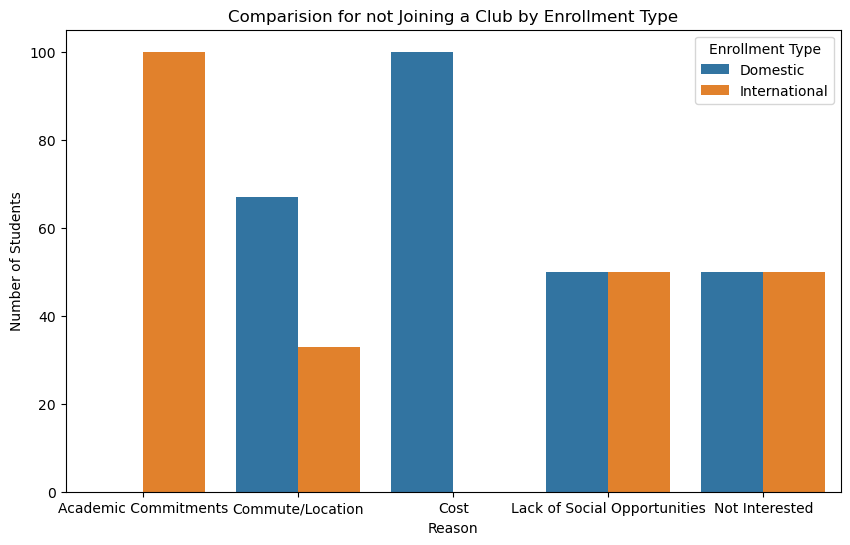

In [76]:
dom_int_njc_melted = dom_int_njc.melt(
    id_vars='not_join_club',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(10, 6))
sns.barplot(x='not_join_club', y='Number of Students', hue='Student Type', data=dom_int_njc_melted)
plt.ylabel('Number of Students')
plt.xlabel('Reason')
plt.title('Comparision for not Joining a Club by Enrollment Type')
plt.legend(title='Enrollment Type')
plt.show()

not_cont_club and dom/int

In [36]:
dom_int_ncc = nam.groupby("not_cont_club")['dom_int'].value_counts().unstack(fill_value=0).reset_index()
dom_int_ncc

dom_int,not_cont_club,Domestic,International
0,Academic Commitments,0,1
1,"Academic Commitments, Cost, Loss of Interest",1,0
2,Commute/Location,1,0
3,"Commute/Location, Cost",1,0
4,"Commute/Location, Lack of Social Opportunities",0,1
5,"Commute/Location, Lack of Social Opportunities...",0,1
6,"Commute/Location, Loss of Interest",1,0
7,Cost,1,0
8,Lack of Social Opportunities,2,1
9,"Lack of Social Opportunities, Cost, Loss of In...",0,1


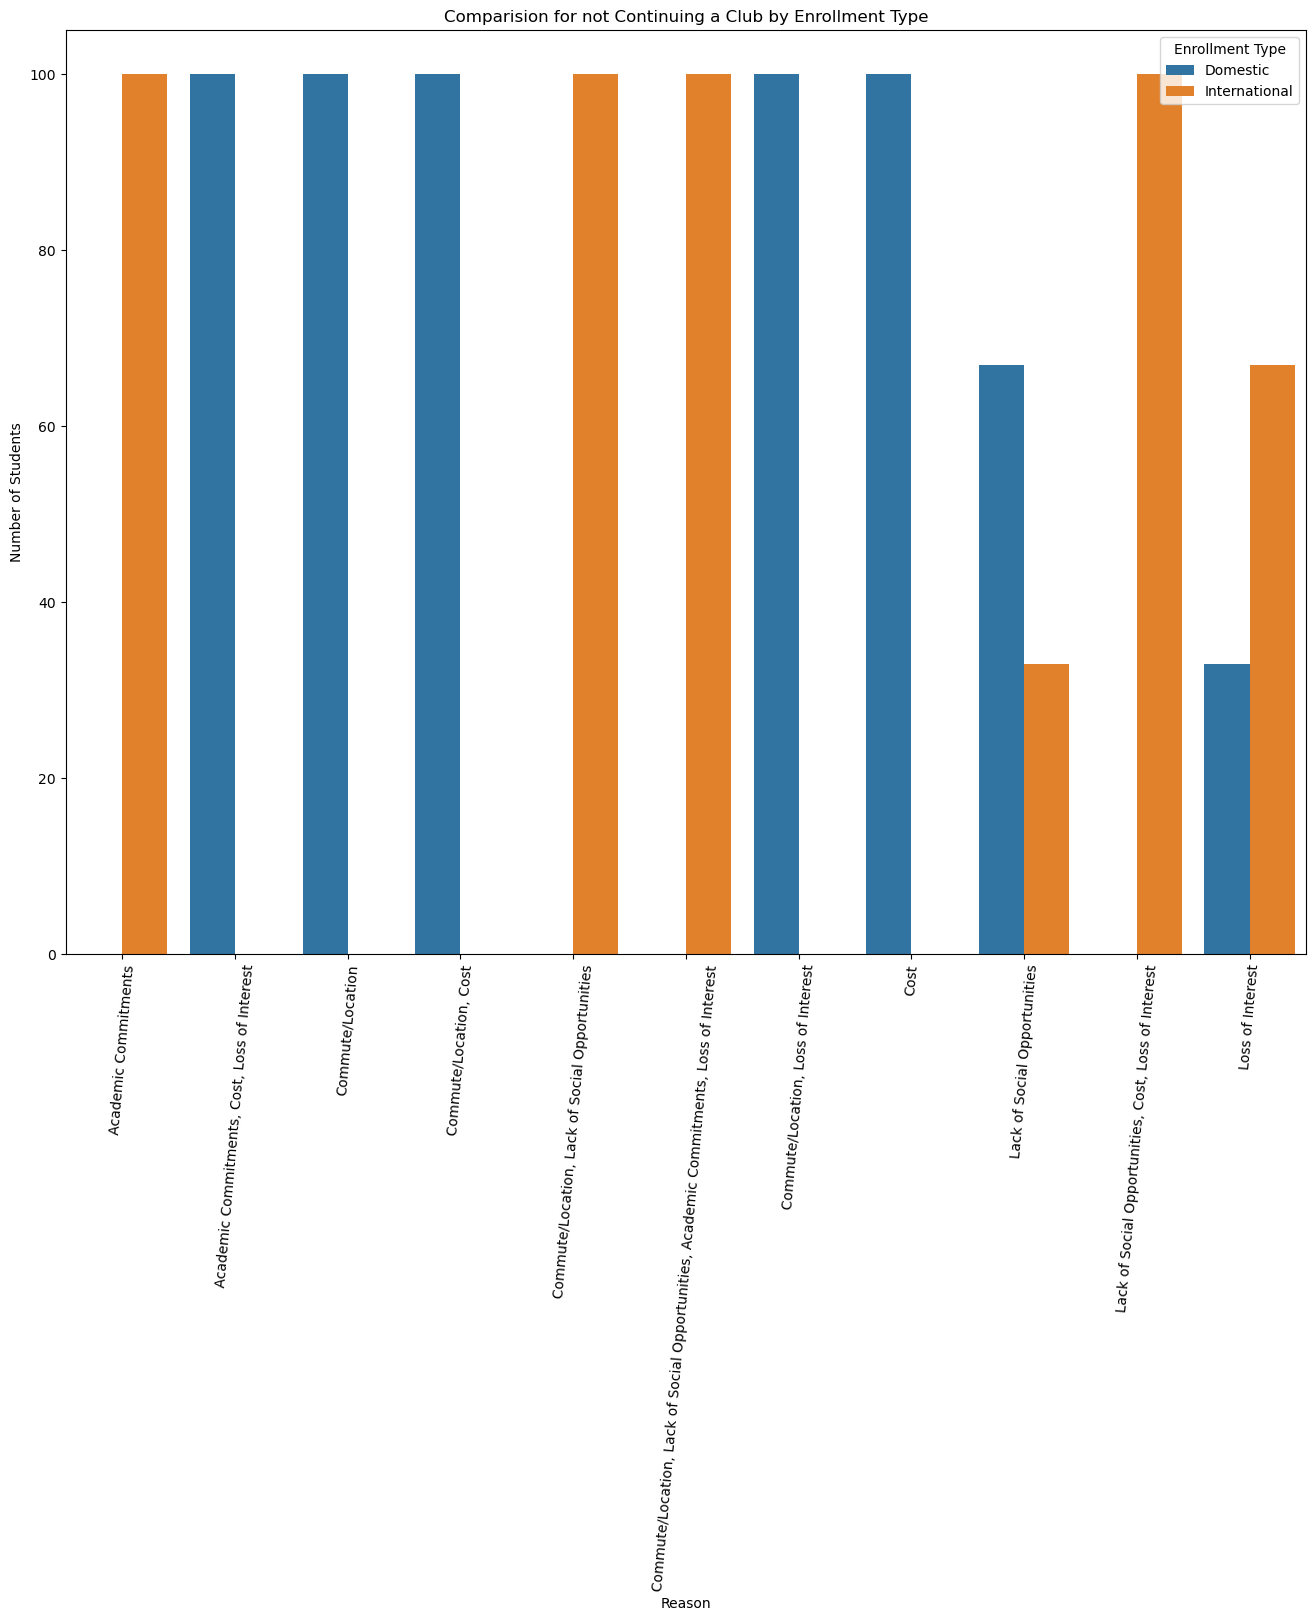

In [74]:
dom_int_ncc_melted = dom_int_ncc.melt(
    id_vars='not_cont_club',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(16, 12))
sns.barplot(x='not_cont_club', y='Number of Students', hue='Student Type', data=dom_int_ncc_melted)
plt.ylabel('Number of Students')
plt.xlabel('Reason')
plt.title('Comparision for not Continuing a Club by Enrollment Type')
plt.xticks(rotation = 85)
plt.legend(title='Enrollment Type')
plt.show()

# Active members

## getting data

In [38]:
am = data[data["club_0"]==False]
am = am[["dom_int","commute_time","num_clubs_socs","usu_club_join","likely_involved_club","optimal_time","avg_hours_campus_non_study","reason_event_choose"]]\
        .reset_index()[["dom_int","num_clubs_socs","commute_time","usu_club_join","likely_involved_club","optimal_time","avg_hours_campus_non_study","reason_event_choose"]]


dom/int and commute time    

In [39]:
am_commute_dom_int_counts = am.groupby('commute_time')['dom_int'].value_counts().unstack(fill_value=0).reset_index()
order = ['Live on campus', '< 30 min', '30 min - 1 hr', '1 hr - 1.5 hr']
am_commute_dom_int_counts['commute_time'] = pd.Categorical(am_commute_dom_int_counts['commute_time'], categories=order, ordered=True)

am_commute_dom_int_counts

dom_int,commute_time,Domestic,International
0,1 hr - 1.5 hr,8,0
1,30 min - 1 hr,23,8
2,< 30 min,7,18
3,Live on campus,0,1


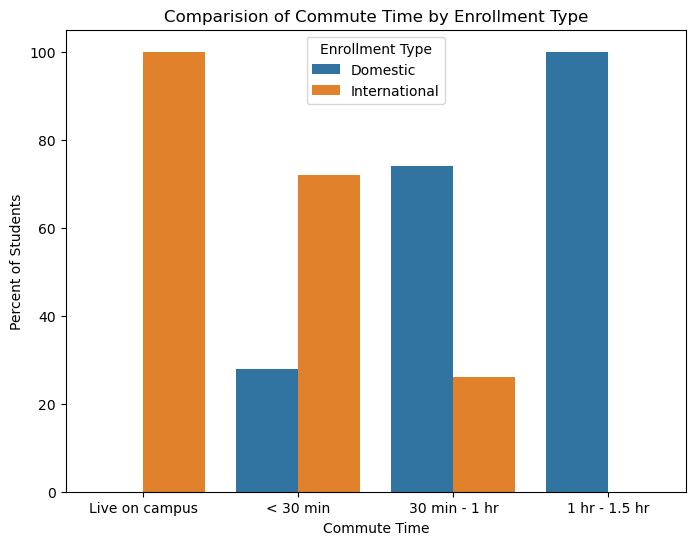

In [80]:
am_commute_dom_int_counts['total'] = am_commute_dom_int_counts['Domestic'] + am_commute_dom_int_counts['International']
am_commute_dom_int_counts['Domestic'] = round(am_commute_dom_int_counts['Domestic']/am_commute_dom_int_counts['total'],2)*100
am_commute_dom_int_counts['International'] = round(am_commute_dom_int_counts['International']/am_commute_dom_int_counts['total'],2)*100
am_commute_dom_int_counts_melted = am_commute_dom_int_counts.melt(
    id_vars='commute_time',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='commute_time', y='Number of Students', hue='Student Type', data=am_commute_dom_int_counts_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Commute Time')
plt.title('Comparision of Commute Time by Enrollment Type')
plt.legend(title='Enrollment Type')
plt.show()

dom/int and number of clubs joined 

In [41]:
am_dom_int_num_club = am.groupby('num_clubs_socs')['dom_int'].value_counts().unstack(fill_value=0).reset_index()
am_dom_int_num_club

dom_int,num_clubs_socs,Domestic,International
0,1,13,8
1,2,12,5
2,3,7,8
3,4,2,3
4,5,1,1
5,6+,3,2


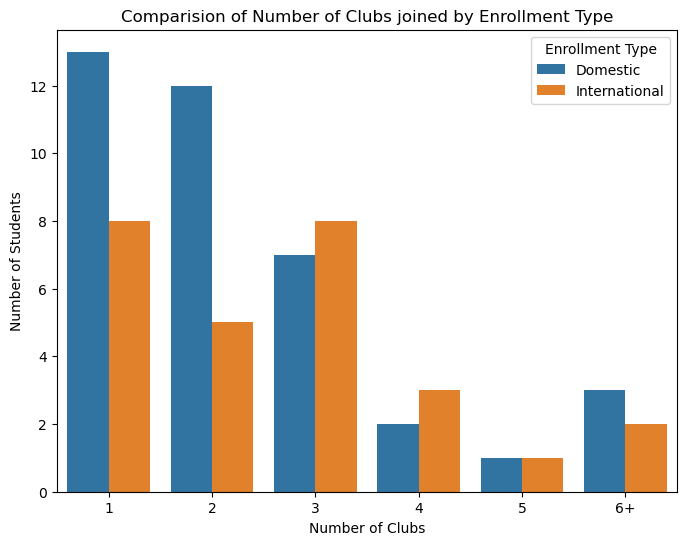

In [57]:
am_dom_int_num_club_melted = am_dom_int_num_club.melt(
    id_vars='num_clubs_socs',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='num_clubs_socs', y='Number of Students', hue='Student Type', data=am_dom_int_num_club_melted)
plt.ylabel('Number of Students')
plt.xlabel('Number of Clubs')
plt.title('Comparision of Number of Clubs joined by Enrollment Type')
plt.legend(title='Enrollment Type')
plt.show()

dom int and likely involvement

In [60]:
am_dom_int_lic = am.groupby('likely_involved_club')['dom_int'].value_counts().unstack(fill_value=0).reset_index()
order = ['Not likely', 'Not very likely', 'Somewhat likely', 'Very likely','Extremely likely']
am_dom_int_lic['likely_involved_club'] = pd.Categorical(am_dom_int_lic['likely_involved_club'], categories=order, ordered=True)

am_dom_int_lic

dom_int,likely_involved_club,Domestic,International
0,Extremely likely,5,4
1,Not likely,1,1
2,Not very likely,5,1
3,Somewhat likely,19,19
4,Very likely,8,2


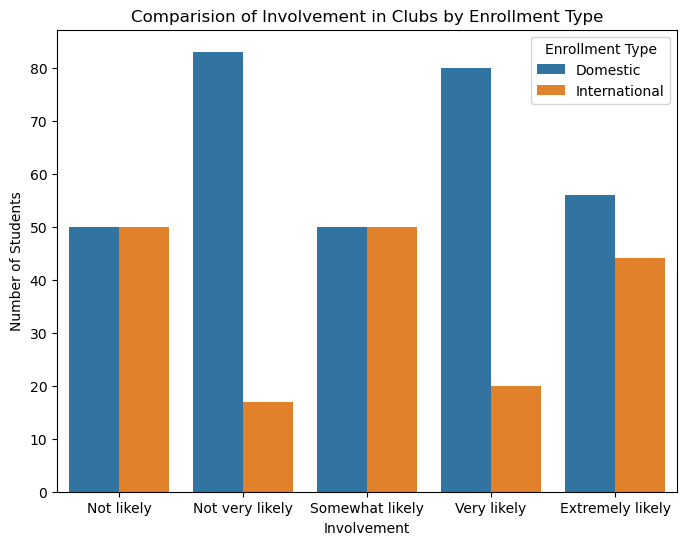

In [61]:
am_dom_int_lic['total'] = am_dom_int_lic['Domestic'] + am_dom_int_lic['International']
am_dom_int_lic['Domestic'] = round(am_dom_int_lic['Domestic']/am_dom_int_lic['total'],2)*100
am_dom_int_lic['International'] = round(am_dom_int_lic['International']/am_dom_int_lic['total'],2)*100
am_dom_int_lic_melted = am_dom_int_lic.melt(
    id_vars='likely_involved_club',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='likely_involved_club', y='Number of Students', hue='Student Type', data=am_dom_int_lic_melted)
plt.ylabel('Number of Students')
plt.xlabel('Involvement')
plt.title('Comparision of Involvement in Clubs by Enrollment Type')
plt.legend(title='Enrollment Type')
plt.show()

dom/int and optimal_time

In [68]:
am_dom_int_ot = am.groupby('optimal_time')['dom_int'].value_counts().unstack(fill_value=0).reset_index()
order1 = ['Weekday mid-day', 'Weekday evenings', 'Weekends']
am_dom_int_ot['optimal_time'] = pd.Categorical(am_dom_int_ot['optimal_time'], categories=order1, ordered=True)
am_dom_int_ot

dom_int,optimal_time,Domestic,International
0,Weekday evenings,28,16
1,Weekday mid-day,8,9
2,Weekends,2,2


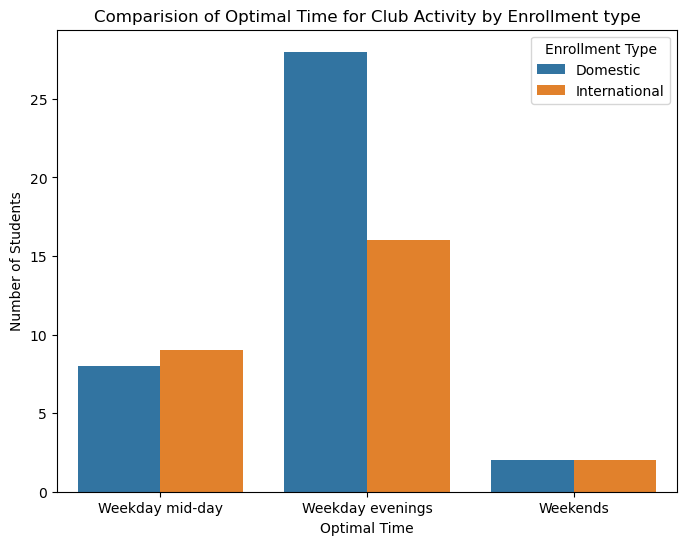

In [70]:

am_dom_int_ot_melted = am_dom_int_ot.melt(
    id_vars='optimal_time',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(8, 6))
sns.barplot(x='optimal_time', y='Number of Students', hue='Student Type', data=am_dom_int_ot_melted)
plt.ylabel('Number of Students')
plt.xlabel('Optimal Time')
plt.title('Comparision of Optimal Time for Club Activity by Enrollment type')
plt.legend(title='Enrollment Type')
plt.show()

dom/int and avg_hours_campus_non_study

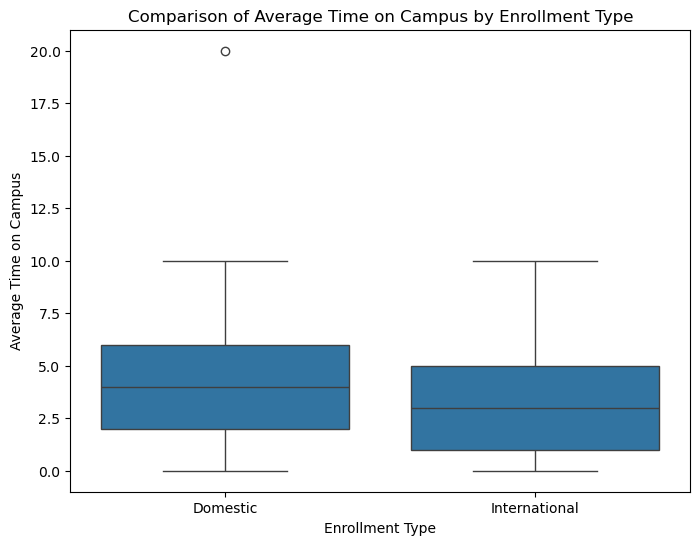

In [71]:
am_dom_int_avg_time = am[["dom_int","avg_hours_campus_non_study"]].dropna()

plt.figure(figsize=(8, 6))
sns.boxplot(x='dom_int', y='avg_hours_campus_non_study', data=am_dom_int_avg_time)
plt.title('Comparison of Average Time on Campus by Enrollment Type')
plt.xlabel('Enrollment Type')
plt.ylabel('Average Time on Campus')
plt.show()


dom int and "reason_event_choose"

In [48]:
am_dom_int_rec = am.groupby('reason_event_choose')['dom_int'].value_counts().unstack(fill_value=0).reset_index()
am_dom_int_rec

dom_int,reason_event_choose,Domestic,International
0,Academic/Career Insights,5,1
1,Commute/Location,8,4
2,Food and Beverages,6,5
3,Social Opportunities,18,17
4,Time and day.,1,0


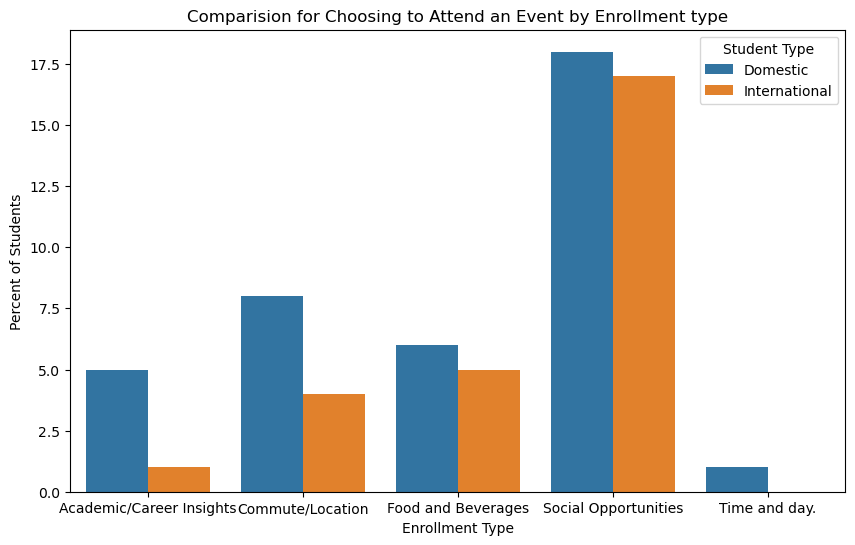

In [73]:
am_dom_int_rec_melted = am_dom_int_rec.melt(
    id_vars='reason_event_choose',
    value_vars=['Domestic', 'International'],
    var_name='Student Type',
    value_name='Number of Students'
)

plt.figure(figsize=(10, 6))
sns.barplot(x='reason_event_choose', y='Number of Students', hue='Student Type', data=am_dom_int_rec_melted)
plt.ylabel('Percent of Students')
plt.xlabel('Commute Time')
plt.title('Comparision for Choosing to Attend an Event by Enrollment type')
plt.xlabel('Enrollment Type')
plt.show()